In [ ]:
# 1. Montar Drive y instalar dependencias
from google.colab import drive
drive.mount('/content/drive')
!pip install roboflow
!pip install ultralytics
!pip install seaborn

# 2. Descargar datasets
from roboflow import Roboflow
rf = Roboflow(api_key="tZR7XZhFvySrbVM3hfH4")

# Dataset 1
print("\nDescargando Coffee-Cherry-2...")
project1 = rf.workspace("coffee-cherry-classification").project("coffee-cherry")
dataset1 = project1.version(2).download("yolov8")

# Dataset 2
print("\nDescargando Coffee-App-1...")
project2 = rf.workspace("coffee-cherry-classification").project("coffee-app")
dataset2 = project2.version(1).download("yolov8")

# Dataset 3
print("\nDescargando Coffee-Cherry-Classification-4...")
project3 = rf.workspace("coffee-cherry-classification").project("coffee-cherry-classification-ybybx")
dataset3 = project3.version(4).download("yolov8")

# Dataset 4
print("\nDescargando Coffee-Fruit-Maturity...")
project4 = rf.workspace("ciencia-cafeto").project("coffee-fruit-maturity-befkg")
dataset4 = project4.version(2).download("yolov8")

# 3. Verificar descarga
print("\nVerificando descargas...")
!ls

# Solo después de confirmar que todos los datasets están descargados,
# procedemos con el análisis

Mounted at /content/drive
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 40.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 111.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 86.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/


Extracting Dataset Version Zip to Coffee-Cherry-2 in yolov8:: 100%|██████████| 66/66 [00:00<00:00, 7563.71it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

Descargando Coffee-App-1...
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Coffee-App-1 in yolov8:: 100%|██████████| 686/686 [00:00<00:00, 7311.62it/s]


Descargando Coffee-Cherry-Classification-4...
loading Roboflow workspace...


loading Roboflow project...



Extracting Dataset Version Zip to Coffee-Cherry-Classification-4 in yolov8:: 100%|██████████| 320/320 [00:00<00:00, 7527.89it/s]


Descargando Coffee-Fruit-Maturity...
loading Roboflow workspace...


loading Roboflow project...



Extracting Dataset Version Zip to Coffee-Fruit-Maturity-☕🍒-2 in yolov8:: 100%|██████████| 4520/4520 [00:00<00:00, 6707.14it/s]



Verificando descargas...
Coffee-App-1	 Coffee-Cherry-Classification-4  drive
Coffee-Cherry-2  Coffee-Fruit-Maturity-☕🍒-2	 sample_data


In [ ]:
# Primero, veamos qué hay en cada directorio
for dataset in ['Coffee-Cherry-2', 'Coffee-App-1', 'Coffee-Cherry-Classification-4', 'Coffee-Fruit-Maturity-☕🍒-2']:
    print(f"\nContenido de {dataset}:")
    !ls {dataset}

# Veamos si los data.yaml están donde deberían
for dataset in ['Coffee-Cherry-2', 'Coffee-App-1', 'Coffee-Cherry-Classification-4', 'Coffee-Fruit-Maturity-☕🍒-2']:
    print(f"\nBuscando data.yaml en {dataset}:")
    !find {dataset} -name "data.yaml"


Contenido de Coffee-Cherry-2:
data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid

Contenido de Coffee-App-1:

Contenido de Coffee-Cherry-Classification-4:
data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid

Contenido de Coffee-Fruit-Maturity-☕🍒-2:
data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid

Buscando data.yaml en Coffee-Cherry-2:
Coffee-Cherry-2/data.yaml

Buscando data.yaml en Coffee-App-1:

Buscando data.yaml en Coffee-Cherry-Classification-4:
Coffee-Cherry-Classification-4/data.yaml

Buscando data.yaml en Coffee-Fruit-Maturity-☕🍒-2:
Coffee-Fruit-Maturity-☕🍒-2/data.yaml


In [ ]:
!rm -rf Coffee-App-1

print("\nReintentando descarga de Coffee-App-1...")
project2 = rf.workspace("coffee-cherry-classification").project("coffee-app")
dataset2 = project2.version(1).download("yolov8")

# Verificar que se descargó correctamente
print("\nVerificando contenido:")
!ls Coffee-App-1


Reintentando descarga de Coffee-App-1...
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Coffee-App-1 in yolov8:: 100%|██████████| 686/686 [00:00<00:00, 7216.07it/s]



Verificando contenido:
data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid



Análisis del dataset: Coffee-Cherry

Total de imágenes únicas: 27

Distribución de etiquetas:
- unripe: 166 etiquetas en 21 imágenes
- ripe: 178 etiquetas en 24 imágenes
- overripe: 88 etiquetas en 13 imágenes
- semi-ripe: 87 etiquetas en 17 imágenes

Análisis del dataset: Coffee-App

Total de imágenes únicas: 337

Distribución de etiquetas:
- semi-ripe: 738 etiquetas en 218 imágenes
- unripe: 1322 etiquetas en 254 imágenes
- ripe: 816 etiquetas en 230 imágenes
- overripe: 148 etiquetas en 74 imágenes

Análisis del dataset: Coffee-Cherry-Class

Total de imágenes únicas: 154

Distribución de etiquetas:
- unripe: 1351 etiquetas en 127 imágenes
- ripe: 1509 etiquetas en 129 imágenes
- semi-ripe: 183 etiquetas en 78 imágenes
- overripe: 71 etiquetas en 26 imágenes

Análisis del dataset: Coffee-Maturity

Total de imágenes únicas: 2254

Distribución de etiquetas:
- unripe: 25124 etiquetas en 1966 imágenes
- dry: 1246 etiquetas en 306 imágenes
- semi-ripe: 2019 etiquetas en 462 imágenes
- ri

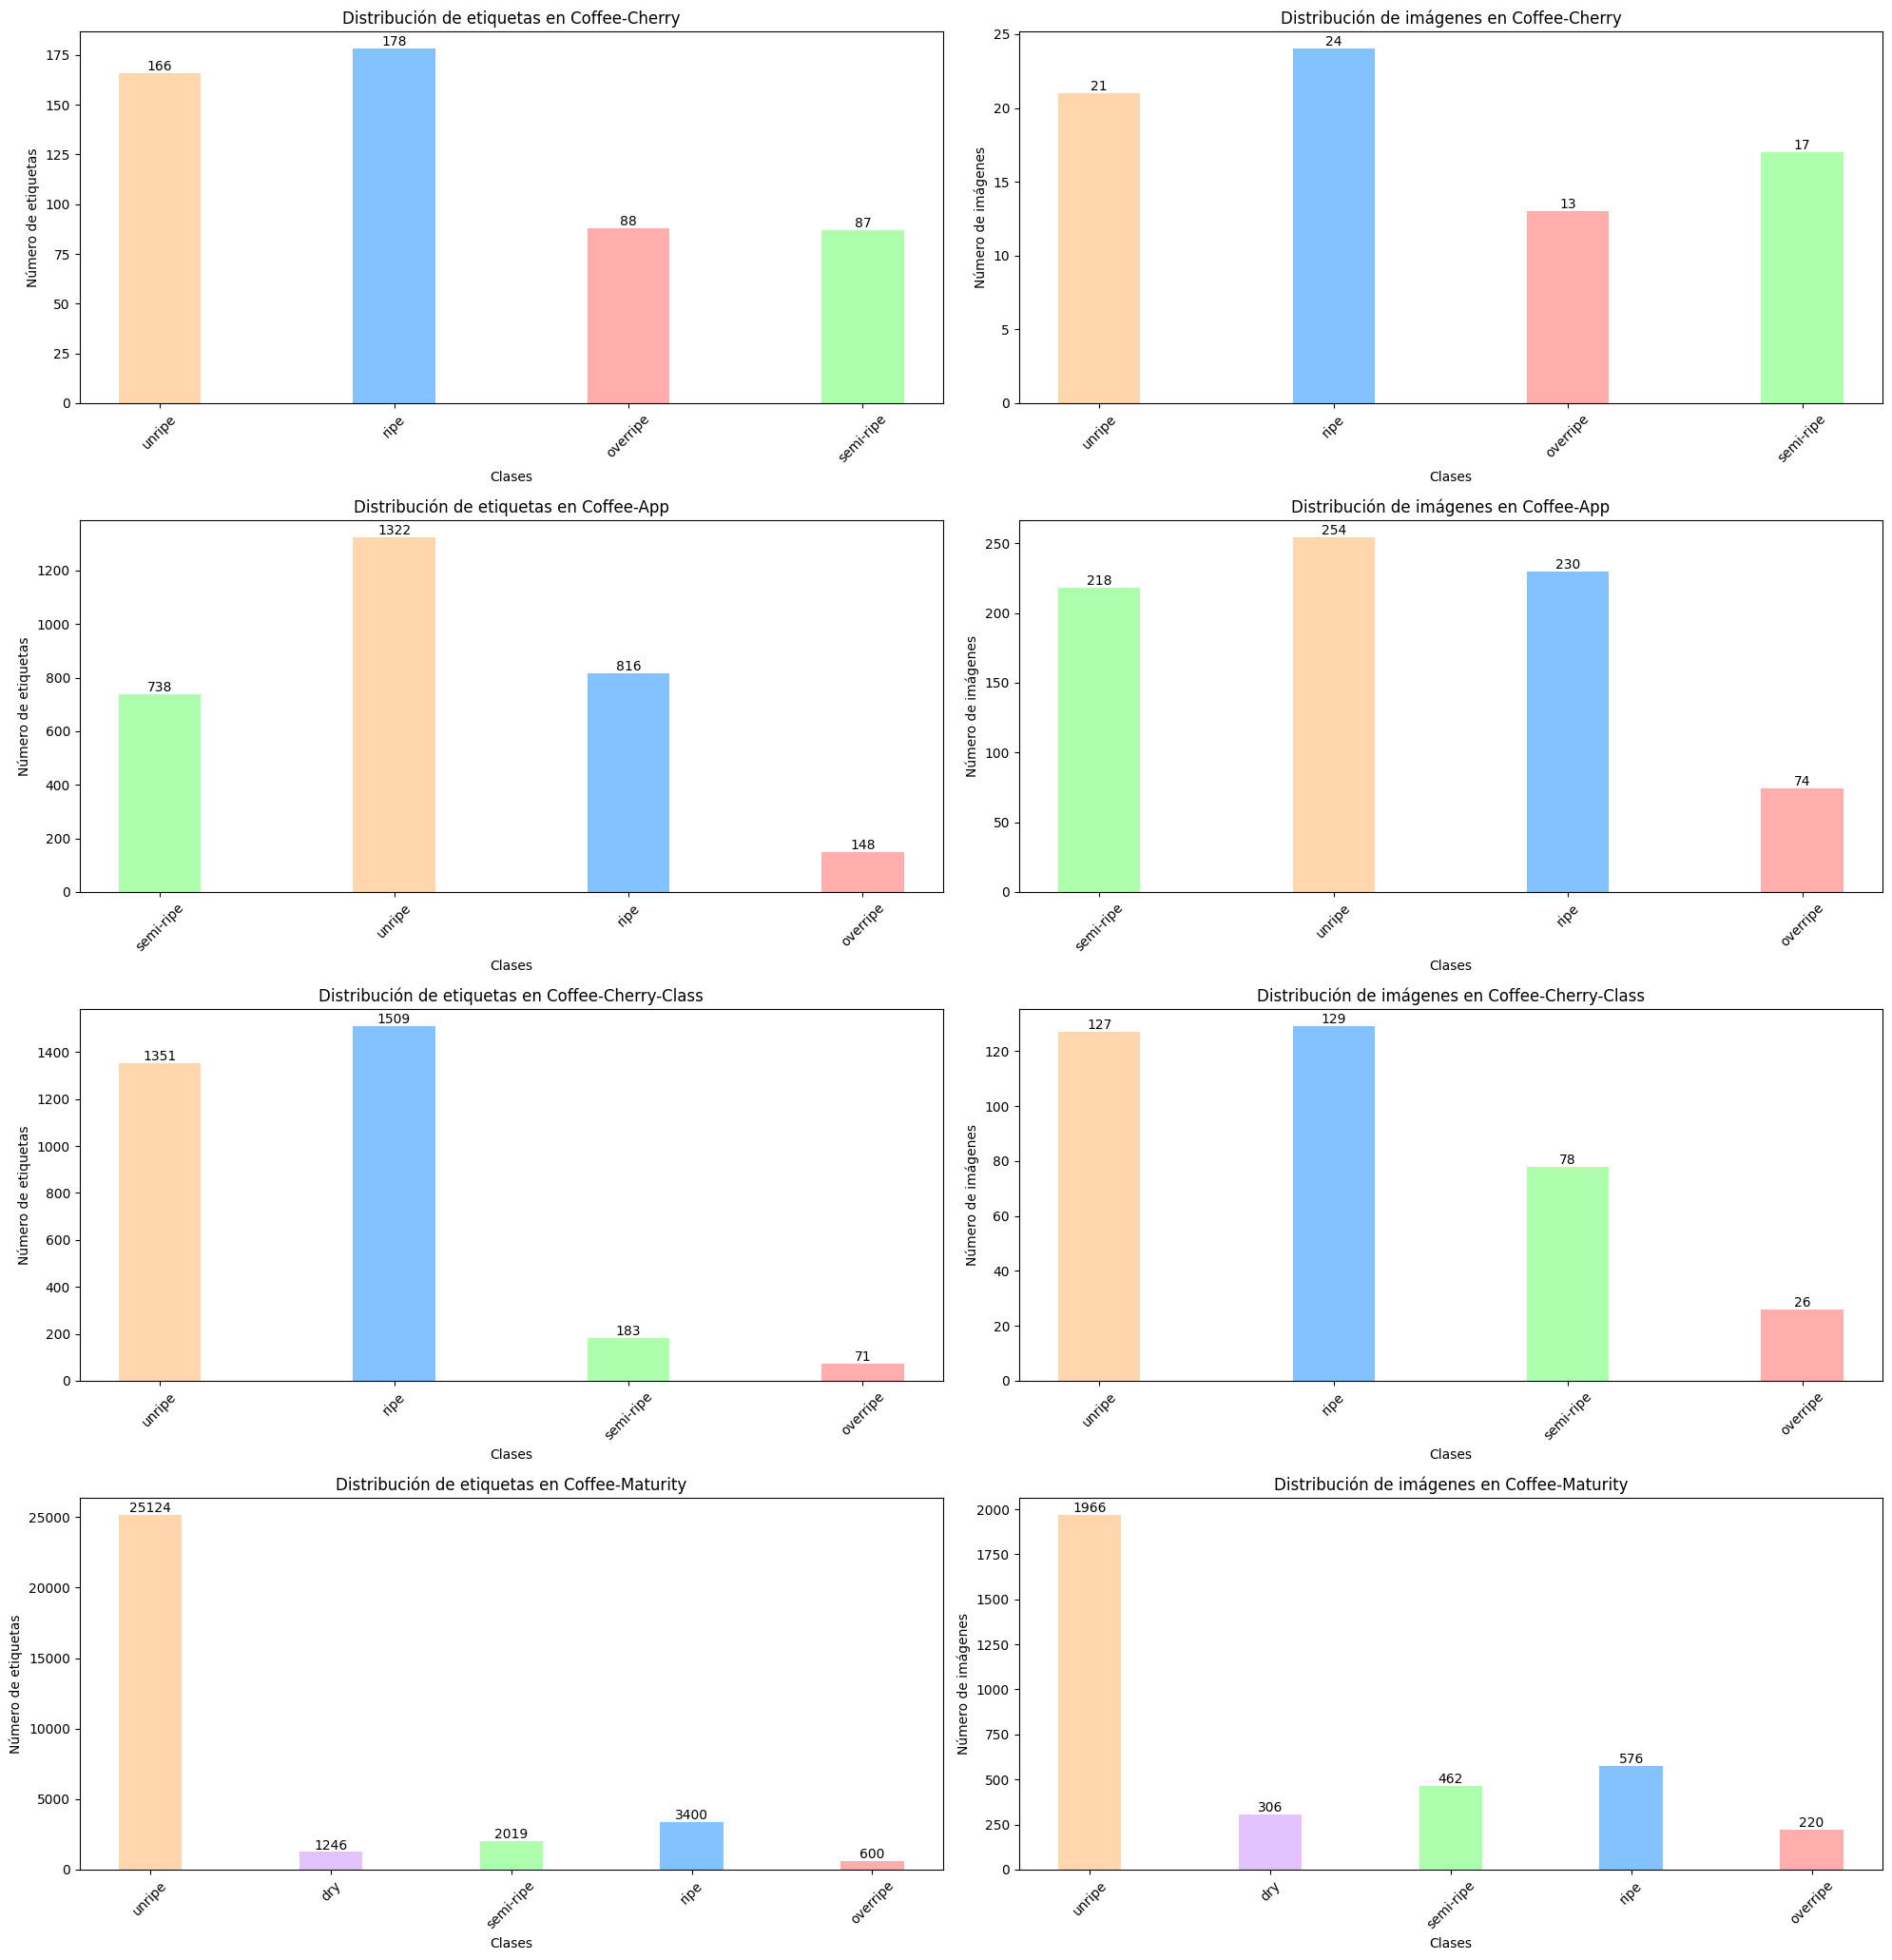

In [ ]:
import yaml
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

def analizar_datasets_individuales():
    # Usar los nombres exactos de los directorios
    datasets = [
        'Coffee-Cherry-2',
        'Coffee-App-1',
        'Coffee-Cherry-Classification-4',
        'Coffee-Fruit-Maturity-☕🍒-2'
    ]

    # Nombres cortos para visualización
    dataset_nombres = [
        'Coffee-Cherry',
        'Coffee-App',
        'Coffee-Cherry-Class',
        'Coffee-Maturity'
    ]

    # Colores específicos para cada clase
    class_colors = {
        'overripe': '#ff9999',    # Rosa claro
        'ripe': '#66b3ff',        # Azul claro
        'semi-ripe': '#99ff99',   # Verde claro
        'unripe': '#ffcc99',      # Naranja claro
        'dry': '#DDB4FF'          # Púrpura claro
    }

    # Función auxiliar para normalizar nombres de clases
    def normalizar_clase(nombre):
        nombre = nombre.lower()
        nombre = nombre.replace('_', '-')
        if nombre == 'semi' or nombre == 'semi-ripe':
            return 'semi-ripe'
        return nombre

    # Crear figura con 5 subplots
    fig = plt.figure(figsize=(20, 25))

    # Para cada dataset
    for idx, (dataset, dataset_nombre) in enumerate(zip(datasets, dataset_nombres)):
        print(f"\n{'='*50}")
        print(f"Análisis del dataset: {dataset_nombre}")
        print(f"{'='*50}")

        # Leer datos
        with open(f'{dataset}/data.yaml', 'r') as f:
            config = yaml.safe_load(f)

        # Inicializar contadores
        etiquetas_counts = {}
        imagenes_por_clase = {}
        todas_imagenes = set()

        # Contar etiquetas e imágenes
        for split in ['train', 'valid', 'test']:
            label_dir = Path(f'{dataset}/{split}/labels')
            for label_file in label_dir.glob('*.txt'):
                todas_imagenes.add(str(label_file))

                with open(label_file, 'r') as f:
                    lines = f.readlines()

                    for line in lines:
                        class_id = int(line.split()[0])
                        class_name = normalizar_clase(config['names'][class_id])

                        if class_name not in etiquetas_counts:
                            etiquetas_counts[class_name] = 0
                            imagenes_por_clase[class_name] = set()

                        # Contar cada etiqueta
                        etiquetas_counts[class_name] += 1
                        # Agregar la imagen al set de esa clase
                        imagenes_por_clase[class_name].add(str(label_file))

        # Convertir sets a conteos
        imagenes_counts = {k: len(v) for k, v in imagenes_por_clase.items()}

        # Imprimir resumen
        print(f"\nTotal de imágenes únicas: {len(todas_imagenes)}")
        print("\nDistribución de etiquetas:")
        for clase in etiquetas_counts.keys():
            print(f"- {clase}: {etiquetas_counts[clase]} etiquetas en {imagenes_counts[clase]} imágenes")

        # Crear dos subplots para este dataset
        ax1 = fig.add_subplot(5, 2, 2*idx + 1)
        ax2 = fig.add_subplot(5, 2, 2*idx + 2)

        # Configuración común
        bar_width = 0.35
        opacity = 0.8

        # Preparar datos para gráficas
        clases = list(etiquetas_counts.keys())
        etiquetas = list(etiquetas_counts.values())
        imagenes = [imagenes_counts[clase] for clase in clases]

        # Gráfico de etiquetas
        bars1 = ax1.bar(np.arange(len(clases)), etiquetas, bar_width,
                       alpha=opacity, color=[class_colors[c] for c in clases])

        ax1.set_xlabel('Clases')
        ax1.set_ylabel('Número de etiquetas')
        ax1.set_title(f'Distribución de etiquetas en {dataset_nombre}')
        ax1.set_xticks(np.arange(len(clases)))
        ax1.set_xticklabels(clases, rotation=45)

        # Añadir valores sobre las barras
        for bar in bars1:
            height = bar.get_height()
            ax1.text(bar.get_x() + bar.get_width()/2., height,
                    f'{int(height)}',
                    ha='center', va='bottom')

        # Gráfico de imágenes
        bars2 = ax2.bar(np.arange(len(clases)), imagenes, bar_width,
                       alpha=opacity, color=[class_colors[c] for c in clases])

        ax2.set_xlabel('Clases')
        ax2.set_ylabel('Número de imágenes')
        ax2.set_title(f'Distribución de imágenes en {dataset_nombre}')
        ax2.set_xticks(np.arange(len(clases)))
        ax2.set_xticklabels(clases, rotation=45)

        # Añadir valores sobre las barras
        for bar in bars2:
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width()/2., height,
                    f'{int(height)}',
                    ha='center', va='bottom')

    # Ajustar espaciado
    plt.tight_layout()
    plt.show()

# Ejecutar
analizar_datasets_individuales()


Análisis del dataset: Coffee-Maturity (sin clase 'dry')
Total de imágenes únicas: 2254

Distribución de etiquetas:
- unripe: 25124 etiquetas en 1966 imágenes
- semi-ripe: 2019 etiquetas en 462 imágenes
- ripe: 3400 etiquetas en 576 imágenes
- overripe: 600 etiquetas en 220 imágenes


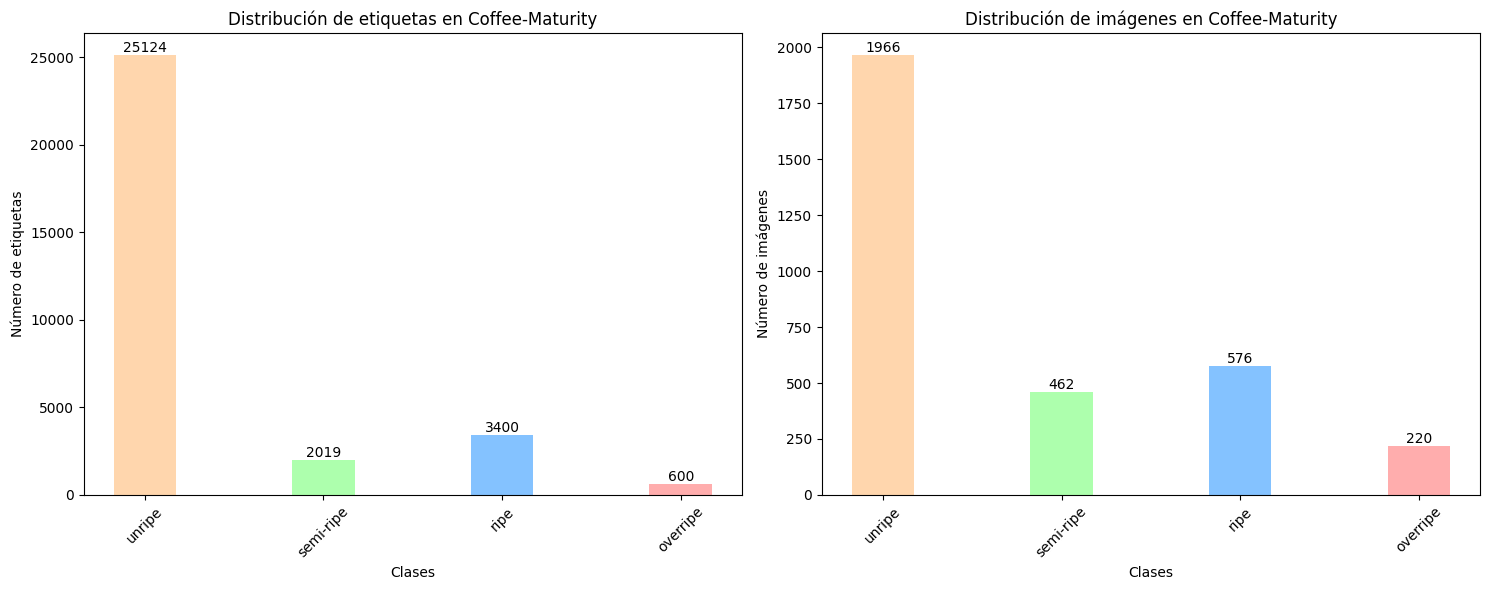

In [ ]:
import yaml
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

def analizar_dataset_maturity():
    dataset = 'Coffee-Fruit-Maturity-☕🍒-2'
    dataset_nombre = 'Coffee-Maturity'

    # Colores específicos para cada clase
    class_colors = {
        'overripe': '#ff9999',    # Rosa claro
        'ripe': '#66b3ff',        # Azul claro
        'semi-ripe': '#99ff99',   # Verde claro
        'unripe': '#ffcc99'       # Naranja claro
    }

    def normalizar_clase(nombre):
        nombre = nombre.lower()
        nombre = nombre.replace('_', '-')
        if nombre == 'semi' or nombre == 'semi-ripe':
            return 'semi-ripe'
        return nombre

    # Crear figura
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Inicializar contadores
    etiquetas_counts = {}
    imagenes_por_clase = {}
    todas_imagenes = set()

    # Leer datos
    with open(f'{dataset}/data.yaml', 'r') as f:
        config = yaml.safe_load(f)

    # Contar etiquetas e imágenes
    for split in ['train', 'valid', 'test']:
        label_dir = Path(f'{dataset}/{split}/labels')
        for label_file in label_dir.glob('*.txt'):
            todas_imagenes.add(str(label_file))

            with open(label_file, 'r') as f:
                lines = f.readlines()

                for line in lines:
                    class_id = int(line.split()[0])
                    class_name = normalizar_clase(config['names'][class_id])

                    # Saltar la clase 'dry'
                    if class_name == 'dry':
                        continue

                    if class_name not in etiquetas_counts:
                        etiquetas_counts[class_name] = 0
                        imagenes_por_clase[class_name] = set()

                    etiquetas_counts[class_name] += 1
                    imagenes_por_clase[class_name].add(str(label_file))

    # Convertir sets a conteos
    imagenes_counts = {k: len(v) for k, v in imagenes_por_clase.items()}

    # Imprimir resumen
    print(f"\nAnálisis del dataset: {dataset_nombre} (sin clase 'dry')")
    print("="*50)
    print(f"Total de imágenes únicas: {len(todas_imagenes)}")
    print("\nDistribución de etiquetas:")
    for clase in etiquetas_counts.keys():
        print(f"- {clase}: {etiquetas_counts[clase]} etiquetas en {imagenes_counts[clase]} imágenes")

    # Preparar datos para gráficas
    clases = list(etiquetas_counts.keys())
    etiquetas = list(etiquetas_counts.values())
    imagenes = [imagenes_counts[clase] for clase in clases]

    # Gráfico de etiquetas
    bars1 = ax1.bar(np.arange(len(clases)), etiquetas, 0.35,
                   alpha=0.8, color=[class_colors[c] for c in clases])

    ax1.set_xlabel('Clases')
    ax1.set_ylabel('Número de etiquetas')
    ax1.set_title('Distribución de etiquetas en Coffee-Maturity')
    ax1.set_xticks(np.arange(len(clases)))
    ax1.set_xticklabels(clases, rotation=45)

    # Añadir valores sobre las barras
    for bar in bars1:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom')

    # Gráfico de imágenes
    bars2 = ax2.bar(np.arange(len(clases)), imagenes, 0.35,
                   alpha=0.8, color=[class_colors[c] for c in clases])

    ax2.set_xlabel('Clases')
    ax2.set_ylabel('Número de imágenes')
    ax2.set_title('Distribución de imágenes en Coffee-Maturity')
    ax2.set_xticks(np.arange(len(clases)))
    ax2.set_xticklabels(clases, rotation=45)

    # Añadir valores sobre las barras
    for bar in bars2:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# Ejecutar
analizar_dataset_maturity()


Procesando dataset: Coffee-Cherry-2

Procesando dataset: Coffee-App-1

Procesando dataset: Coffee-Cherry-Classification-4

Procesando dataset: Coffee-Fruit-Maturity-☕🍒-2

RESUMEN TOTAL DE TODOS LOS DATASETS
Total de imágenes únicas: 2772

Distribución total de etiquetas:
- overripe: 907 etiquetas en 333 imágenes
- ripe: 5903 etiquetas en 959 imágenes
- semi-ripe: 3027 etiquetas en 775 imágenes
- unripe: 27963 etiquetas en 2368 imágenes


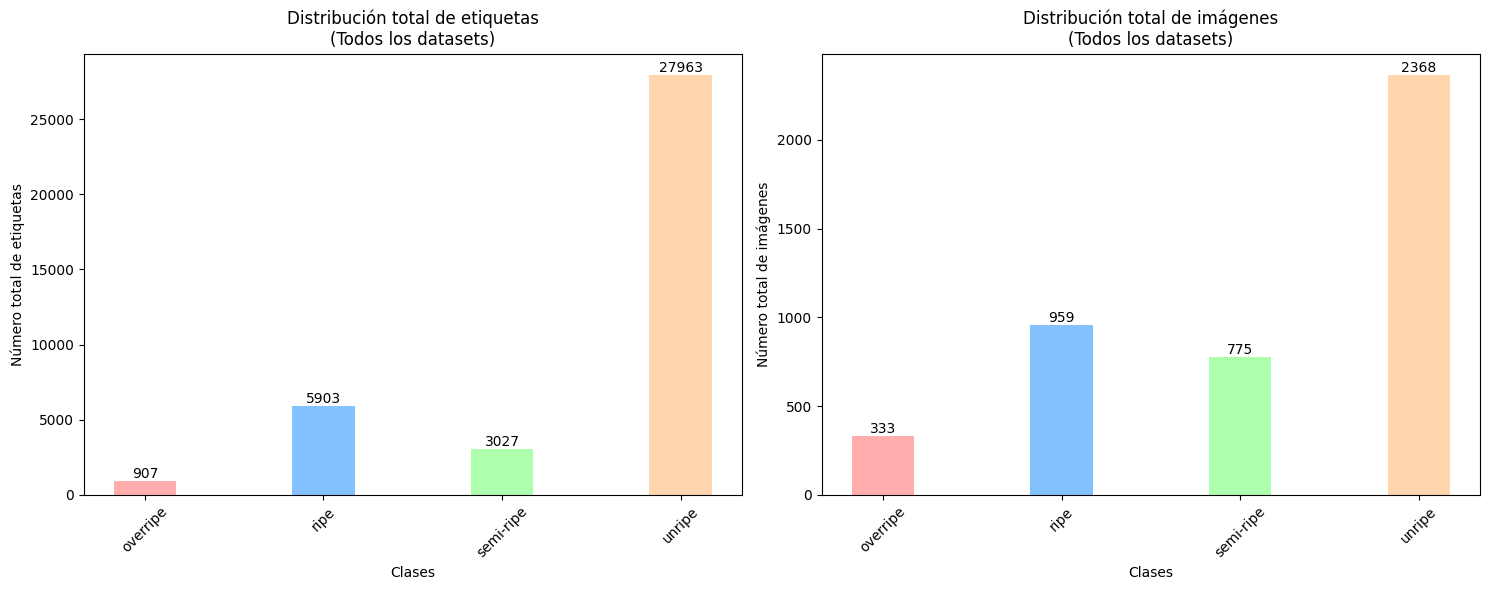

In [ ]:
import yaml
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

def analizar_datasets_unificados():
    datasets = [
        'Coffee-Cherry-2',
        'Coffee-App-1',
        'Coffee-Cherry-Classification-4',
        'Coffee-Fruit-Maturity-☕🍒-2'
    ]

    # Colores específicos para cada clase
    class_colors = {
        'overripe': '#ff9999',    # Rosa claro
        'ripe': '#66b3ff',        # Azul claro
        'semi-ripe': '#99ff99',   # Verde claro
        'unripe': '#ffcc99'       # Naranja claro
    }

    def normalizar_clase(nombre):
        nombre = nombre.lower()
        nombre = nombre.replace('_', '-')
        if nombre == 'semi' or nombre == 'semi-ripe':
            return 'semi-ripe'
        return nombre

    # Inicializar contadores totales
    etiquetas_total = {
        'overripe': 0,
        'ripe': 0,
        'semi-ripe': 0,
        'unripe': 0
    }

    imagenes_total = {
        'overripe': set(),
        'ripe': set(),
        'semi-ripe': set(),
        'unripe': set()
    }

    todas_imagenes = set()

    # Procesar cada dataset
    for dataset in datasets:
        print(f"\nProcesando dataset: {dataset}")

        with open(f'{dataset}/data.yaml', 'r') as f:
            config = yaml.safe_load(f)

        for split in ['train', 'valid', 'test']:
            label_dir = Path(f'{dataset}/{split}/labels')
            for label_file in label_dir.glob('*.txt'):
                image_path = f"{dataset}/{label_file}"
                todas_imagenes.add(image_path)

                with open(label_file, 'r') as f:
                    lines = f.readlines()

                    for line in lines:
                        class_id = int(line.split()[0])
                        class_name = normalizar_clase(config['names'][class_id])

                        # Saltar la clase 'dry'
                        if class_name == 'dry':
                            continue

                        if class_name in etiquetas_total:
                            etiquetas_total[class_name] += 1
                            imagenes_total[class_name].add(image_path)

    # Convertir sets a conteos
    imagenes_counts = {k: len(v) for k, v in imagenes_total.items()}

    # Crear figura
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Preparar datos para gráficas
    clases = list(etiquetas_total.keys())
    etiquetas = list(etiquetas_total.values())
    imagenes = list(imagenes_counts.values())

    # Imprimir resumen
    print("\n" + "="*50)
    print("RESUMEN TOTAL DE TODOS LOS DATASETS")
    print("="*50)
    print(f"Total de imágenes únicas: {len(todas_imagenes)}")
    print("\nDistribución total de etiquetas:")
    for clase in clases:
        print(f"- {clase}: {etiquetas_total[clase]} etiquetas en {imagenes_counts[clase]} imágenes")

    # Gráfico de etiquetas
    bars1 = ax1.bar(np.arange(len(clases)), etiquetas, 0.35,
                   alpha=0.8, color=[class_colors[c] for c in clases])

    ax1.set_xlabel('Clases')
    ax1.set_ylabel('Número total de etiquetas')
    ax1.set_title('Distribución total de etiquetas\n(Todos los datasets)')
    ax1.set_xticks(np.arange(len(clases)))
    ax1.set_xticklabels(clases, rotation=45)

    # Añadir valores sobre las barras
    for bar in bars1:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom')

    # Gráfico de imágenes
    bars2 = ax2.bar(np.arange(len(clases)), imagenes, 0.35,
                   alpha=0.8, color=[class_colors[c] for c in clases])

    ax2.set_xlabel('Clases')
    ax2.set_ylabel('Número total de imágenes')
    ax2.set_title('Distribución total de imágenes\n(Todos los datasets)')
    ax2.set_xticks(np.arange(len(clases)))
    ax2.set_xticklabels(clases, rotation=45)

    # Añadir valores sobre las barras
    for bar in bars2:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# Ejecutar
analizar_datasets_unificados()


Procesando dataset: Coffee-Cherry-2

Procesando dataset: Coffee-App-1

Procesando dataset: Coffee-Cherry-Classification-4

Procesando dataset: Coffee-Fruit-Maturity-☕🍒-2

Análisis por clase:

OVERRIPE:
- Granos originales: 907
- Imágenes originales: 333
- Densidad: 2.7 granos/imagen
- Objetivo: 5000 granos
- Imágenes necesarias: 1836
- Necesita generar 4093 granos adicionales

RIPE:
- Granos originales: 5903
- Imágenes originales: 959
- Densidad: 6.2 granos/imagen
- Objetivo: 5000 granos
- Imágenes necesarias: 813
- Necesita reducir 903 granos

SEMI-RIPE:
- Granos originales: 3027
- Imágenes originales: 775
- Densidad: 3.9 granos/imagen
- Objetivo: 5000 granos
- Imágenes necesarias: 1281
- Necesita generar 1973 granos adicionales

UNRIPE:
- Granos originales: 27963
- Imágenes originales: 2368
- Densidad: 11.8 granos/imagen
- Objetivo: 5000 granos
- Imágenes necesarias: 424
- Necesita reducir 22963 granos


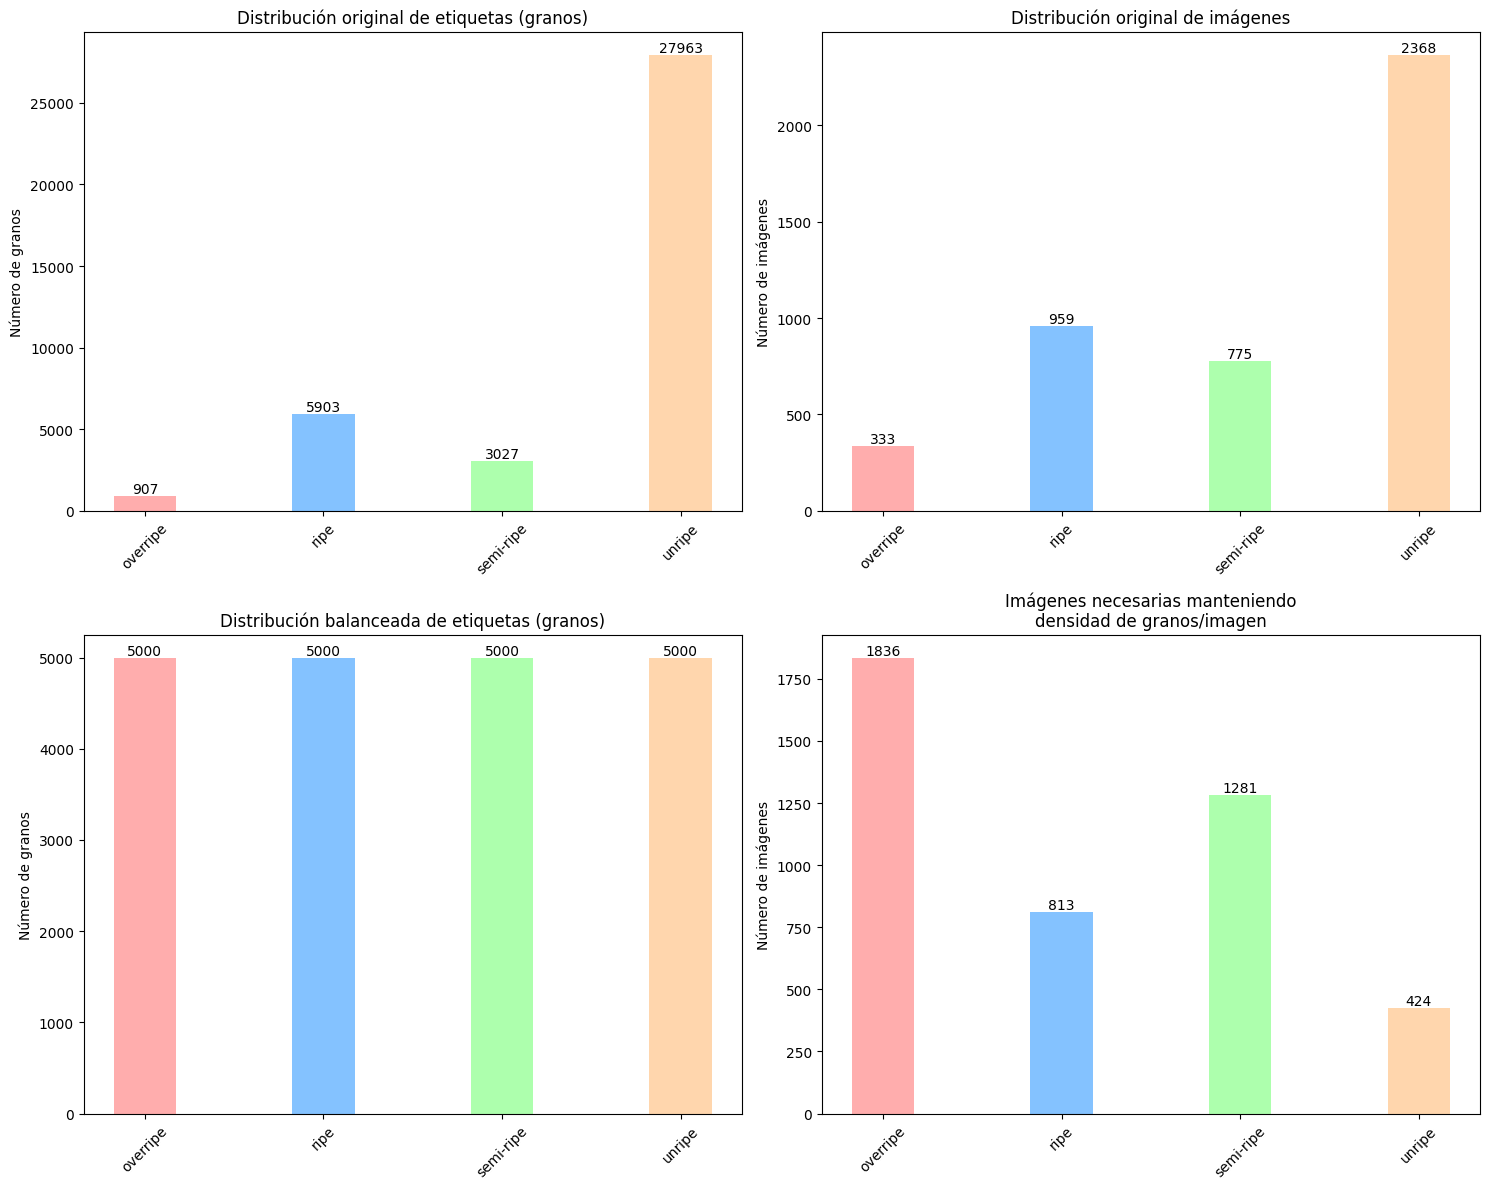

In [ ]:
import yaml
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import random
random.seed(42)

def analizar_y_balancear_datasets():
    datasets = [
        'Coffee-Cherry-2',
        'Coffee-App-1',
        'Coffee-Cherry-Classification-4',
        'Coffee-Fruit-Maturity-☕🍒-2'
    ]

    TARGET_BEANS = 5000  # Objetivo de granos por clase

    class_colors = {
        'overripe': '#ff9999',
        'ripe': '#66b3ff',
        'semi-ripe': '#99ff99',
        'unripe': '#ffcc99'
    }

    def normalizar_clase(nombre):
        nombre = nombre.lower()
        nombre = nombre.replace('_', '-')
        if nombre == 'semi' or nombre == 'semi-ripe':
            return 'semi-ripe'
        return nombre

    # Inicializar contadores
    etiquetas_original = {k: 0 for k in class_colors.keys()}
    imagenes_por_clase = {k: set() for k in class_colors.keys()}
    todas_imagenes = set()

    # Recolectar datos originales
    for dataset in datasets:
        print(f"\nProcesando dataset: {dataset}")

        with open(f'{dataset}/data.yaml', 'r') as f:
            config = yaml.safe_load(f)

        for split in ['train', 'valid', 'test']:
            label_dir = Path(f'{dataset}/{split}/labels')
            for label_file in label_dir.glob('*.txt'):
                image_path = f"{dataset}/{label_file}"
                todas_imagenes.add(image_path)

                with open(label_file, 'r') as f:
                    for line in f:
                        class_id = int(line.split()[0])
                        class_name = normalizar_clase(config['names'][class_id])

                        if class_name == 'dry':
                            continue

                        etiquetas_original[class_name] += 1
                        imagenes_por_clase[class_name].add(image_path)

    # Calcular densidades y proyecciones
    densidades = {}
    imagenes_necesarias = {}
    for clase in class_colors.keys():
        num_etiquetas = etiquetas_original[clase]
        num_imagenes = len(imagenes_por_clase[clase])
        densidad = num_etiquetas / num_imagenes if num_imagenes > 0 else 0
        densidades[clase] = densidad

        # Calcular imágenes necesarias manteniendo la densidad
        imagenes_necesarias[clase] = int(np.ceil(TARGET_BEANS / densidad)) if densidad > 0 else 0

    # Crear visualización
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

    # Datos para gráficas
    clases = list(class_colors.keys())
    etiquetas_orig = [etiquetas_original[c] for c in clases]
    imagenes_orig = [len(imagenes_por_clase[c]) for c in clases]
    etiquetas_bal = [TARGET_BEANS] * len(clases)
    imagenes_bal = [imagenes_necesarias[c] for c in clases]

    # Gráfica 1: Etiquetas originales
    bars1 = ax1.bar(np.arange(len(clases)), etiquetas_orig, 0.35,
                   alpha=0.8, color=[class_colors[c] for c in clases])
    ax1.set_title('Distribución original de etiquetas (granos)')
    ax1.set_ylabel('Número de granos')

    # Gráfica 2: Imágenes originales
    bars2 = ax2.bar(np.arange(len(clases)), imagenes_orig, 0.35,
                   alpha=0.8, color=[class_colors[c] for c in clases])
    ax2.set_title('Distribución original de imágenes')
    ax2.set_ylabel('Número de imágenes')

    # Gráfica 3: Etiquetas balanceadas
    bars3 = ax3.bar(np.arange(len(clases)), etiquetas_bal, 0.35,
                   alpha=0.8, color=[class_colors[c] for c in clases])
    ax3.set_title('Distribución balanceada de etiquetas (granos)')
    ax3.set_ylabel('Número de granos')

    # Gráfica 4: Imágenes necesarias
    bars4 = ax4.bar(np.arange(len(clases)), imagenes_bal, 0.35,
                   alpha=0.8, color=[class_colors[c] for c in clases])
    ax4.set_title('Imágenes necesarias manteniendo\ndensidad de granos/imagen')
    ax4.set_ylabel('Número de imágenes')

    # Configuración común para todos los ejes
    for ax in [ax1, ax2, ax3, ax4]:
        ax.set_xticks(np.arange(len(clases)))
        ax.set_xticklabels(clases, rotation=45)
        for bars in ax.containers:
            ax.bar_label(bars)

    # Imprimir análisis
    print("\nAnálisis por clase:")
    for clase in class_colors.keys():
        print(f"\n{clase.upper()}:")
        print(f"- Granos originales: {etiquetas_original[clase]}")
        print(f"- Imágenes originales: {len(imagenes_por_clase[clase])}")
        print(f"- Densidad: {densidades[clase]:.1f} granos/imagen")
        print(f"- Objetivo: {TARGET_BEANS} granos")
        print(f"- Imágenes necesarias: {imagenes_necesarias[clase]}")
        if etiquetas_original[clase] < TARGET_BEANS:
            print(f"- Necesita generar {TARGET_BEANS - etiquetas_original[clase]} granos adicionales")
        else:
            print(f"- Necesita reducir {etiquetas_original[clase] - TARGET_BEANS} granos")

    plt.tight_layout()
    plt.show()

# Ejecutar
analizar_y_balancear_datasets()

In [ ]:
import yaml
from pathlib import Path
import random
import shutil
import cv2
import numpy as np
from tqdm import tqdm
import albumentations as A
!pip install ultralytics -q

class DatasetBalancer:
    def __init__(self, target_beans=5000):
        self.datasets = [
            'Coffee-Cherry-2',
            'Coffee-App-1',
            'Coffee-Cherry-Classification-4',
            'Coffee-Fruit-Maturity-☕🍒-2'
        ]
        self.TARGET_BEANS = target_beans
        self.OUTPUT_DIR = 'balanced_coffee_dataset'

        self.transform = A.Compose([
            A.RandomRotate90(p=0.5),
            A.HorizontalFlip(p=0.5),
            A.VerticalFlip(p=0.5),
            A.RandomBrightnessContrast(p=0.2),
            A.GaussNoise(p=0.2)
        ], bbox_params=A.BboxParams(format='yolo', label_fields=['class_labels']))

    def normalizar_clase(self, nombre):
        nombre = nombre.lower()
        nombre = nombre.replace('_', '-')
        if nombre == 'semi' or nombre == 'semi-ripe':
            return 'semi-ripe'
        return nombre

    def validar_bbox(self, parts):
        """Valida y limpia las coordenadas de bounding box"""
        try:
            if len(parts) < 5:
                print(f"Error: línea con menos de 5 valores: {parts}")
                return None, None

            class_id = int(parts[0])
            # Tomar solo los primeros 4 valores después del class_id
            coords = list(map(float, parts[1:5]))

            # Validar que las coordenadas estén en el rango [0, 1]
            if all(0 <= x <= 1 for x in coords):
                return class_id, coords
            else:
                print(f"Error: coordenadas fuera de rango [0, 1]: {coords}")
                return None, None
        except Exception as e:
            print(f"Error procesando bbox: {e}, parts: {parts}")
            return None, None

    def crear_estructura_directorios(self):
        base_dir = Path(self.OUTPUT_DIR)
        for split in ['train', 'val', 'test']:
            (base_dir / split / 'images').mkdir(parents=True, exist_ok=True)
            (base_dir / split / 'labels').mkdir(parents=True, exist_ok=True)
        return base_dir

    def copiar_archivo_con_augmentation(self, img_path, label_path, new_img_path, new_label_path, apply_aug=False):
        # Leer imagen
        image = cv2.imread(str(img_path))
        if image is None:
            print(f"Error leyendo imagen: {img_path}")
            return False

        # Leer y validar etiquetas
        bboxes = []
        class_labels = []
        try:
            with open(label_path, 'r') as f:
                for line in f:
                    parts = line.strip().split()
                    class_id, coords = self.validar_bbox(parts)
                    if class_id is not None and coords is not None:
                        bboxes.append(coords)
                        class_labels.append(class_id)
        except Exception as e:
            print(f"Error leyendo etiquetas de {label_path}: {e}")
            return False

        if not bboxes:
            print(f"No se encontraron bboxes válidos en {label_path}")
            return False

        if apply_aug:
            try:
                transformed = self.transform(
                    image=image,
                    bboxes=bboxes,
                    class_labels=class_labels
                )
                image = transformed['image']
                bboxes = transformed['bboxes']
                class_labels = transformed['class_labels']
            except Exception as e:
                print(f"Error en aumentación: {e}")
                return False

        # Guardar imagen y etiquetas
        try:
            cv2.imwrite(str(new_img_path), image)
            with open(new_label_path, 'w') as f:
                for bbox, class_id in zip(bboxes, class_labels):
                    f.write(f"{class_id} {' '.join(map(str, bbox))}\n")
            return True
        except Exception as e:
            print(f"Error guardando archivos: {e}")
            return False

    def balancear_dataset(self):
        print("Iniciando balanceo del dataset...")
        base_dir = self.crear_estructura_directorios()
        all_data = {'overripe': [], 'ripe': [], 'semi-ripe': [], 'unripe': []}

        # Procesar datasets
        for dataset in self.datasets:
            dataset_path = Path(dataset)
            print(f"Procesando dataset: {dataset}")

            try:
                with open(dataset_path / 'data.yaml', 'r') as f:
                    config = yaml.safe_load(f)
            except Exception as e:
                print(f"Error leyendo YAML de {dataset}: {e}")
                continue

            for split in ['train', 'valid', 'test']:
                label_dir = dataset_path / split / 'labels'
                img_dir = dataset_path / split / 'images'

                if not label_dir.exists() or not img_dir.exists():
                    continue

                for label_file in label_dir.glob('*.txt'):
                    # Verificar archivo de etiquetas
                    try:
                        with open(label_file, 'r') as f:
                            content = f.read().strip()
                        if not content:  # Saltar archivos vacíos
                            continue
                    except Exception as e:
                        print(f"Error leyendo {label_file}: {e}")
                        continue

                    # Buscar imagen correspondiente
                    img_file = None
                    for ext in ['.jpg', '.png', '.jpeg']:
                        temp_img = img_dir / label_file.with_suffix(ext).name
                        if temp_img.exists():
                            img_file = temp_img
                            break

                    if img_file is None:
                        continue

                    # Contar granos por clase
                    class_counts = {k: 0 for k in all_data.keys()}
                    with open(label_file, 'r') as f:
                        for line in f:
                            parts = line.strip().split()
                            if len(parts) >= 5:  # Asegurar que la línea tiene suficientes partes
                                class_id = int(parts[0])
                                if class_id < len(config['names']):
                                    class_name = self.normalizar_clase(config['names'][class_id])
                                    if class_name != 'dry' and class_name in class_counts:
                                        class_counts[class_name] += 1

                    # Agregar a las listas correspondientes
                    for class_name, count in class_counts.items():
                        if count > 0:
                            all_data[class_name].append({
                                'img_path': img_file,
                                'label_path': label_file,
                                'bean_count': count
                            })

        # Procesar cada clase
        for class_name, images in all_data.items():
            print(f"\nProcesando clase: {class_name}")
            total_beans = sum(img['bean_count'] for img in images)

            if total_beans > self.TARGET_BEANS:
                print(f"Reduciendo de {total_beans} a {self.TARGET_BEANS} granos")
                random.shuffle(images)
                current_beans = 0
                selected_images = []

                for img in images:
                    if current_beans + img['bean_count'] <= self.TARGET_BEANS:
                        selected_images.append(img)
                        current_beans += img['bean_count']
                    if current_beans >= self.TARGET_BEANS:
                        break

                images = selected_images
            else:
                print(f"Aumentando de {total_beans} a {self.TARGET_BEANS} granos")
                additional_needed = self.TARGET_BEANS - total_beans
                original_images = images.copy()

                while additional_needed > 0:
                    for img in original_images:
                        if additional_needed <= 0:
                            break
                        images.append({
                            'img_path': img['img_path'],
                            'label_path': img['label_path'],
                            'bean_count': img['bean_count'],
                            'augment': True
                        })
                        additional_needed -= img['bean_count']

            # Copiar/aumentar imágenes
            print(f"Copiando imágenes para {class_name}...")
            successful_copies = 0
            for i, img_data in enumerate(tqdm(images)):
                new_img_path = base_dir / 'train' / 'images' / f"{class_name}_{i}.jpg"
                new_label_path = base_dir / 'train' / 'labels' / f"{class_name}_{i}.txt"

                if self.copiar_archivo_con_augmentation(
                    img_data['img_path'],
                    img_data['label_path'],
                    new_img_path,
                    new_label_path,
                    apply_aug=img_data.get('augment', False)
                ):
                    successful_copies += 1

            print(f"Copiadas exitosamente {successful_copies} imágenes para {class_name}")

        # Crear data.yaml
        yaml_content = {
            'path': str(base_dir.absolute()),
            'train': str(base_dir / 'train'),
            'val': str(base_dir / 'val'),
            'test': str(base_dir / 'test'),
            'names': ['overripe', 'ripe', 'semi-ripe', 'unripe']
        }

        with open(base_dir / 'data.yaml', 'w') as f:
            yaml.dump(yaml_content, f)

        print("\n¡Balanceo completado!")
        print(f"Dataset balanceado guardado en: {self.OUTPUT_DIR}")

# Ejecutar
balancer = DatasetBalancer(target_beans=5000)
balancer.balancear_dataset()

/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.7'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 112.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 90.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 39.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 104.8 MB/s eta 0:00:00
Iniciando balanceo del dataset...
Procesando dataset: Coffee-Cherry-2
Error leyendo YAML de Coffee-Cherry-2: [Errno 2] No 

In [ ]:
import yaml
from pathlib import Path
import random
import shutil
import cv2
import numpy as np
from tqdm import tqdm
import albumentations as A

class DatasetBalancer:
    def __init__(self, target_beans=5000):
        self.datasets = [
            'Coffee-Cherry-2',
            'Coffee-App-1',
            'Coffee-Cherry-Classification-4',
            'Coffee-Fruit-Maturity-☕🍒-2'
        ]
        self.TARGET_BEANS = target_beans
        self.OUTPUT_DIR = 'balanced_coffee_dataset'
        # Proporciones para la división de datos
        self.TRAIN_RATIO = 0.8
        self.VAL_RATIO = 0.1
        self.TEST_RATIO = 0.1

        # Configurar aumentación de datos
        self.transform = A.Compose([
            A.RandomRotate90(p=0.5),
            A.HorizontalFlip(p=0.5),
            A.VerticalFlip(p=0.5),
            A.RandomBrightnessContrast(p=0.2),
            A.GaussNoise(p=0.2)
        ], bbox_params=A.BboxParams(format='yolo', label_fields=['class_labels']))

    def normalizar_clase(self, nombre):
        nombre = nombre.lower()
        nombre = nombre.replace('_', '-')
        if nombre == 'semi' or nombre == 'semi-ripe':
            return 'semi-ripe'
        return nombre

    def crear_estructura_directorios(self):
        base_dir = Path(self.OUTPUT_DIR)
        for split in ['train', 'val', 'test']:
            (base_dir / split / 'images').mkdir(parents=True, exist_ok=True)
            (base_dir / split / 'labels').mkdir(parents=True, exist_ok=True)
        return base_dir

    def copiar_archivo_con_augmentation(self, img_path, label_path, new_img_path, new_label_path, apply_aug=False):
        # Leer imagen
        image = cv2.imread(str(img_path))
        if image is None:
            print(f"Error leyendo imagen: {img_path}")
            return False

        # Leer y validar etiquetas
        bboxes = []
        class_labels = []
        try:
            with open(label_path, 'r') as f:
                for line in f:
                    parts = line.strip().split()
                    if len(parts) >= 5:  # class_id x y w h
                        class_id = int(parts[0])
                        coords = list(map(float, parts[1:5]))
                        if all(0 <= x <= 1 for x in coords):
                            bboxes.append(coords)
                            class_labels.append(class_id)
        except Exception as e:
            print(f"Error leyendo etiquetas de {label_path}: {e}")
            return False

        if not bboxes:
            print(f"No se encontraron bboxes válidos en {label_path}")
            return False

        if apply_aug:
            try:
                transformed = self.transform(
                    image=image,
                    bboxes=bboxes,
                    class_labels=class_labels
                )
                image = transformed['image']
                bboxes = transformed['bboxes']
                class_labels = transformed['class_labels']
            except Exception as e:
                print(f"Error en aumentación: {e}")
                return False

        # Guardar imagen y etiquetas
        try:
            cv2.imwrite(str(new_img_path), image)
            with open(new_label_path, 'w') as f:
                for bbox, class_id in zip(bboxes, class_labels):
                    f.write(f"{class_id} {' '.join(map(str, bbox))}\n")
            return True
        except Exception as e:
            print(f"Error guardando archivos: {e}")
            return False

    def balancear_dataset(self):
        print("Iniciando balanceo del dataset...")
        base_dir = self.crear_estructura_directorios()
        all_data = {'overripe': [], 'ripe': [], 'semi-ripe': [], 'unripe': []}

        # Recolectar datos
        for dataset in self.datasets:
            dataset_path = Path(dataset)
            print(f"Procesando dataset: {dataset}")

            with open(dataset_path / 'data.yaml', 'r') as f:
                config = yaml.safe_load(f)

            for split in ['train', 'valid', 'test']:
                label_dir = dataset_path / split / 'labels'
                img_dir = dataset_path / split / 'images'

                for label_file in label_dir.glob('*.txt'):
                    img_file = None
                    for ext in ['.jpg', '.png', '.jpeg']:
                        temp_img = img_dir / label_file.with_suffix(ext).name
                        if temp_img.exists():
                            img_file = temp_img
                            break

                    if img_file is None:
                        continue

                    # Contar granos por clase
                    class_counts = {k: 0 for k in all_data.keys()}
                    with open(label_file, 'r') as f:
                        for line in f:
                            parts = line.strip().split()
                            if len(parts) >= 5:
                                class_id = int(parts[0])
                                class_name = self.normalizar_clase(config['names'][class_id])
                                if class_name != 'dry' and class_name in class_counts:
                                    class_counts[class_name] += 1

                    for class_name, count in class_counts.items():
                        if count > 0:
                            all_data[class_name].append({
                                'img_path': img_file,
                                'label_path': label_file,
                                'bean_count': count
                            })

        # Procesar cada clase
        for class_name, images in all_data.items():
            print(f"\nProcesando clase: {class_name}")
            total_beans = sum(img['bean_count'] for img in images)

            # Balancear la cantidad de granos
            if total_beans > self.TARGET_BEANS:
                print(f"Reduciendo de {total_beans} a {self.TARGET_BEANS} granos")
                random.shuffle(images)
                current_beans = 0
                selected_images = []

                for img in images:
                    if current_beans + img['bean_count'] <= self.TARGET_BEANS:
                        selected_images.append(img)
                        current_beans += img['bean_count']
                    if current_beans >= self.TARGET_BEANS:
                        break

                images = selected_images
            else:
                print(f"Aumentando de {total_beans} a {self.TARGET_BEANS} granos")
                additional_needed = self.TARGET_BEANS - total_beans
                original_images = images.copy()

                while additional_needed > 0:
                    for img in original_images:
                        if additional_needed <= 0:
                            break
                        images.append({
                            'img_path': img['img_path'],
                            'label_path': img['label_path'],
                            'bean_count': img['bean_count'],
                            'augment': True
                        })
                        additional_needed -= img['bean_count']

            # Dividir en train/val/test
            random.shuffle(images)
            n_images = len(images)
            train_idx = int(n_images * self.TRAIN_RATIO)
            val_idx = train_idx + int(n_images * self.VAL_RATIO)

            splits = {
                'train': images[:train_idx],
                'val': images[train_idx:val_idx],
                'test': images[val_idx:]
            }

            # Copiar imágenes a cada split
            for split_name, split_images in splits.items():
                print(f"Copiando imágenes de {class_name} para {split_name}...")
                for i, img_data in enumerate(tqdm(split_images)):
                    new_img_path = base_dir / split_name / 'images' / f"{class_name}_{split_name}_{i}.jpg"
                    new_label_path = base_dir / split_name / 'labels' / f"{class_name}_{split_name}_{i}.txt"

                    self.copiar_archivo_con_augmentation(
                        img_data['img_path'],
                        img_data['label_path'],
                        new_img_path,
                        new_label_path,
                        apply_aug=img_data.get('augment', False)
                    )

        # Crear data.yaml actualizado
        yaml_content = {
            'path': str(base_dir.absolute()),
            'train': str(base_dir / 'train'),
            'val': str(base_dir / 'val'),
            'test': str(base_dir / 'test'),
            'names': ['overripe', 'ripe', 'semi-ripe', 'unripe']
        }

        with open(base_dir / 'data.yaml', 'w') as f:
            yaml.dump(yaml_content, f)

        print("\n¡Balanceo completado!")
        print(f"Dataset balanceado guardado en: {self.OUTPUT_DIR}")

# Ejecutar
if __name__ == "__main__":
    balancer = DatasetBalancer(target_beans=5000)
    balancer.balancear_dataset()

Iniciando balanceo del dataset...
Procesando dataset: Coffee-Cherry-2


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.2 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


FileNotFoundError: [Errno 2] No such file or directory: 'Coffee-Cherry-2/data.yaml'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import subprocess
import sys
import yaml
from pathlib import Path
import random
import shutil
import cv2
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from datetime import datetime

# Definir la ruta base en Drive donde se guardarán los resultados
DRIVE_BASE_PATH = Path('/content/drive/MyDrive/coffee_project')  # Puedes cambiar 'coffee_project' por la carpeta que prefieras
DRIVE_BASE_PATH.mkdir(parents=True, exist_ok=True)

# Instalar dependencias
def install_requirements():
    requirements = ['ultralytics', 'matplotlib', 'pandas', 'albumentations']
    for package in requirements:
        try:
            __import__(package)
        except ImportError:
            print(f"Instalando {package}...")
            subprocess.check_call([sys.executable, "-m", "pip", "install", package])

print("Verificando e instalando dependencias necesarias...")
install_requirements()

import albumentations as A
from ultralytics import YOLO

class DatasetBalancer:
    def __init__(self, target_beans=5000):
        self.datasets = [
            'Coffee-Cherry-2',
            'Coffee-App-1',
            'Coffee-Cherry-Classification-4',
            'Coffee-Fruit-Maturity-☕🍒-2'
        ]
        self.TARGET_BEANS = target_beans
        self.OUTPUT_DIR = DRIVE_BASE_PATH / 'balanced_coffee_dataset'
        self.TRAIN_RATIO = 0.8
        self.VAL_RATIO = 0.1
        self.TEST_RATIO = 0.1

        self.transform = A.Compose([
            A.RandomRotate90(p=0.5),
            A.HorizontalFlip(p=0.5),
            A.VerticalFlip(p=0.5),
            A.RandomBrightnessContrast(p=0.2),
            A.GaussNoise(p=0.2)
        ], bbox_params=A.BboxParams(format='yolo', label_fields=['class_labels']))

    def normalizar_clase(self, nombre):
        nombre = nombre.lower()
        nombre = nombre.replace('_', '-')
        if nombre == 'semi' or nombre == 'semi-ripe':
            return 'semi-ripe'
        return nombre

    def crear_estructura_directorios(self):
        base_dir = self.OUTPUT_DIR
        for split in ['train', 'val', 'test']:
            (base_dir / split / 'images').mkdir(parents=True, exist_ok=True)
            (base_dir / split / 'labels').mkdir(parents=True, exist_ok=True)
        return base_dir

    def copiar_archivo_con_augmentation(self, img_path, label_path, new_img_path, new_label_path, apply_aug=False):
        image = cv2.imread(str(img_path))
        if image is None:
            print(f"Error leyendo imagen: {img_path}")
            return False

        bboxes = []
        class_labels = []
        try:
            with open(label_path, 'r') as f:
                for line in f:
                    parts = line.strip().split()
                    if len(parts) >= 5:
                        class_id = int(parts[0])
                        coords = list(map(float, parts[1:5]))
                        if all(0 <= x <= 1 for x in coords):
                            bboxes.append(coords)
                            class_labels.append(class_id)
        except Exception as e:
            print(f"Error leyendo etiquetas de {label_path}: {e}")
            return False

        if not bboxes:
            print(f"No se encontraron bboxes válidos en {label_path}")
            return False

        if apply_aug:
            try:
                transformed = self.transform(
                    image=image,
                    bboxes=bboxes,
                    class_labels=class_labels
                )
                image = transformed['image']
                bboxes = transformed['bboxes']
                class_labels = transformed['class_labels']
            except Exception as e:
                print(f"Error en aumentación: {e}")
                return False

        try:
            cv2.imwrite(str(new_img_path), image)
            with open(new_label_path, 'w') as f:
                for bbox, class_id in zip(bboxes, class_labels):
                    f.write(f"{class_id} {' '.join(map(str, bbox))}\n")
            return True
        except Exception as e:
            print(f"Error guardando archivos: {e}")
            return False

    def balancear_dataset(self):
        print("Iniciando balanceo del dataset...")
        base_dir = self.crear_estructura_directorios()
        all_data = {'overripe': [], 'ripe': [], 'semi-ripe': [], 'unripe': []}

        for dataset in self.datasets:
            dataset_path = Path(dataset)
            print(f"Procesando dataset: {dataset}")

            with open(dataset_path / 'data.yaml', 'r') as f:
                config = yaml.safe_load(f)

            for split in ['train', 'valid', 'test']:
                label_dir = dataset_path / split / 'labels'
                img_dir = dataset_path / split / 'images'

                if not label_dir.exists() or not img_dir.exists():
                    continue

                for label_file in label_dir.glob('*.txt'):
                    img_file = None
                    for ext in ['.jpg', '.png', '.jpeg']:
                        temp_img = img_dir / label_file.with_suffix(ext).name
                        if temp_img.exists():
                            img_file = temp_img
                            break

                    if img_file is None:
                        continue

                    class_counts = {k: 0 for k in all_data.keys()}
                    with open(label_file, 'r') as f:
                        for line in f:
                            parts = line.strip().split()
                            if len(parts) >= 5:
                                class_id = int(parts[0])
                                class_name = self.normalizar_clase(config['names'][class_id])
                                if class_name != 'dry' and class_name in class_counts:
                                    class_counts[class_name] += 1

                    for class_name, count in class_counts.items():
                        if count > 0:
                            all_data[class_name].append({
                                'img_path': img_file,
                                'label_path': label_file,
                                'bean_count': count
                            })

        for class_name, images in all_data.items():
            print(f"\nProcesando clase: {class_name}")
            total_beans = sum(img['bean_count'] for img in images)

            if total_beans > self.TARGET_BEANS:
                print(f"Reduciendo de {total_beans} a {self.TARGET_BEANS} granos")
                random.shuffle(images)
                current_beans = 0
                selected_images = []

                for img in images:
                    if current_beans + img['bean_count'] <= self.TARGET_BEANS:
                        selected_images.append(img)
                        current_beans += img['bean_count']
                    if current_beans >= self.TARGET_BEANS:
                        break

                images = selected_images
            else:
                print(f"Aumentando de {total_beans} a {self.TARGET_BEANS} granos")
                additional_needed = self.TARGET_BEANS - total_beans
                original_images = images.copy()

                while additional_needed > 0:
                    for img in original_images:
                        if additional_needed <= 0:
                            break
                        images.append({
                            'img_path': img['img_path'],
                            'label_path': img['label_path'],
                            'bean_count': img['bean_count'],
                            'augment': True
                        })
                        additional_needed -= img['bean_count']

            random.shuffle(images)
            n_images = len(images)
            train_idx = int(n_images * self.TRAIN_RATIO)
            val_idx = train_idx + int(n_images * self.VAL_RATIO)

            splits = {
                'train': images[:train_idx],
                'val': images[train_idx:val_idx],
                'test': images[val_idx:]
            }

            for split_name, split_images in splits.items():
                print(f"Copiando imágenes de {class_name} para {split_name}...")
                for i, img_data in enumerate(tqdm(split_images)):
                    new_img_path = base_dir / split_name / 'images' / f"{class_name}_{split_name}_{i}.jpg"
                    new_label_path = base_dir / split_name / 'labels' / f"{class_name}_{split_name}_{i}.txt"

                    self.copiar_archivo_con_augmentation(
                        img_data['img_path'],
                        img_data['label_path'],
                        new_img_path,
                        new_label_path,
                        apply_aug=img_data.get('augment', False)
                    )

        yaml_content = {
            'path': str(base_dir),
            'train': str(base_dir / 'train'),
            'val': str(base_dir / 'val'),
            'test': str(base_dir / 'test'),
            'names': ['overripe', 'ripe', 'semi-ripe', 'unripe']
        }

        with open(base_dir / 'data.yaml', 'w') as f:
            yaml.dump(yaml_content, f)

        print("\n¡Balanceo completado!")
        print(f"Dataset balanceado guardado en: {self.OUTPUT_DIR}")

class CoffeeModelTrainer:
    def __init__(self, dataset_path):
        self.SAVE_DIR = str(DRIVE_BASE_PATH / 'coffee_training_results')
        self.MODEL_NAME = f'coffee_model_{datetime.now().strftime("%Y%m%d_%H%M")}'
        self.DATASET_PATH = dataset_path

        self.results_dir = Path(self.SAVE_DIR) / self.MODEL_NAME
        self.results_dir.mkdir(parents=True, exist_ok=True)

    def plot_metrics(self, results):
        metrics = ['box_loss', 'cls_loss', 'dfl_loss', 'precision', 'recall', 'mAP50', 'mAP50-95']

        for metric in metrics:
            plt.figure(figsize=(10, 6))
            plt.plot(results.results_dict[metric], label=f'Train {metric}')
            if f'val_{metric}' in results.results_dict:
                plt.plot(results.results_dict[f'val_{metric}'], label=f'Val {metric}')
            plt.title(f'{metric} over epochs')
            plt.xlabel('Epoch')
            plt.ylabel(metric)
            plt.legend()
            plt.grid(True)
            plt.savefig(self.results_dir / f'{metric}_plot.png')
            plt.close()

    def save_training_config(self, config):
        with open(self.results_dir / 'training_config.yaml', 'w') as f:
            yaml.dump(config, f)

    def train(self):
        training_config = {
            'model_type': 'yolov8s.pt',
            'epochs': 100,
            'image_size': 704,
            'batch_size': 16,
            'patience': 25,
            'initial_lr': 0.008,
            'final_lr': 0.0008,
            'warmup_epochs': 5,
            'mosaic': 0.75,
            'dataset': self.DATASET_PATH
        }

        print("Iniciando entrenamiento...")
        print("\nConfiguración:")
        for k, v in training_config.items():
            print(f"{k}: {v}")

        self.save_training_config(training_config)

        model = YOLO('yolov8s.pt')

        try:
            results = model.train(
                data=self.DATASET_PATH,
                epochs=training_config['epochs'],
                imgsz=training_config['image_size'],
                batch=training_config['batch_size'],
                patience=training_config['patience'],
                device=0,
                lr0=training_config['initial_lr'],
                lrf=training_config['final_lr'],
                warmup_epochs=training_config['warmup_epochs'],
                project=self.SAVE_DIR,
                name=self.MODEL_NAME,
                mosaic=training_config['mosaic'],
                save=True,
                save_period=10,
                plots=True
            )

            self.plot_metrics(results)

            final_metrics = {
                'best_epoch': results.best_epoch,
                'final_mAP50': results.results_dict['mAP50'][-1],
                'final_mAP50-95': results.results_dict['mAP50-95'][-1],
                'best_mAP50': max(results.results_dict['mAP50']),
                'best_mAP50-95': max(results.results_dict['mAP50-95'])
            }

            with open(self.results_dir / 'final_metrics.yaml', 'w') as f:
                yaml.dump(final_metrics, f)

            print("\nEntrenamiento completado!")
            print("\nMétricas finales:")
            for k, v in final_metrics.items():
                print(f"{k}: {v}")

            print(f"\nResultados guardados en: {self.results_dir}")

        except Exception as e:
            print(f"Error durante el entrenamiento: {e}")

def main():
    print("\n=== Paso 1: Balanceando Dataset ===")
    balancer = DatasetBalancer(target_beans=5000)
    balancer.balancear_dataset()

    dataset_path = balancer.OUTPUT_DIR / 'data.yaml'
    if not dataset_path.exists():
        raise Exception("Error: No se pudo crear el dataset balanceado")

    for split in ['train', 'val', 'test']:
        if not (balancer.OUTPUT_DIR / split / 'images').exists():
            raise Exception(f"Error: Falta el directorio {split}/images")
        if not (balancer.OUTPUT_DIR / split / 'labels').exists():
            raise Exception(f"Error: Falta el directorio {split}/labels")

    print("\nDataset balanceado creado correctamente")

    print("\n=== Paso 2: Entrenando Modelo ===")
    trainer = CoffeeModelTrainer(str(dataset_path))
    trainer.train()

if __name__ == "__main__":
    try:
        main()
    except Exception as e:
        print(f"Error en la ejecución: {e}")
        raise


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Verificando e instalando dependencias necesarias...


A new version of Albumentations is available: 2.0.2 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.



=== Paso 1: Balanceando Dataset ===
Iniciando balanceo del dataset...
Procesando dataset: Coffee-Cherry-2
Procesando dataset: Coffee-App-1
Procesando dataset: Coffee-Cherry-Classification-4
Procesando dataset: Coffee-Fruit-Maturity-☕🍒-2

Procesando clase: overripe
Aumentando de 907 a 5000 granos
Copiando imágenes de overripe para train...


  0%|          | 0/1472 [00:09<?, ?it/s]


KeyboardInterrupt: 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Métricas del Modelo:

Métricas Globales:
Precisión global: 96.3%
Recall global: 93.2%
mAP50: 97.3%
mAP50-95: 86.6%

Métricas por Clase:

Overripe:
  Precisión: 0.998
  Recall: 0.958
  mAP50: 0.989
  mAP50-95: 0.913

Ripe:
  Precisión: 0.950
  Recall: 0.956
  mAP50: 0.987
  mAP50-95: 0.893

Semi-ripe:
  Precisión: 0.926
  Recall: 0.876
  mAP50: 0.940
  mAP50-95: 0.798

Unripe:
  Precisión: 0.977
  Recall: 0.940
  mAP50: 0.976
  mAP50-95: 0.863

Velocidad de Inferencia:
Preprocesamiento: 0.2ms
Inferencia: 1.1ms
Postprocesamiento: 1.6ms
Total por imagen: 2.9ms

1. Matriz de Confusión


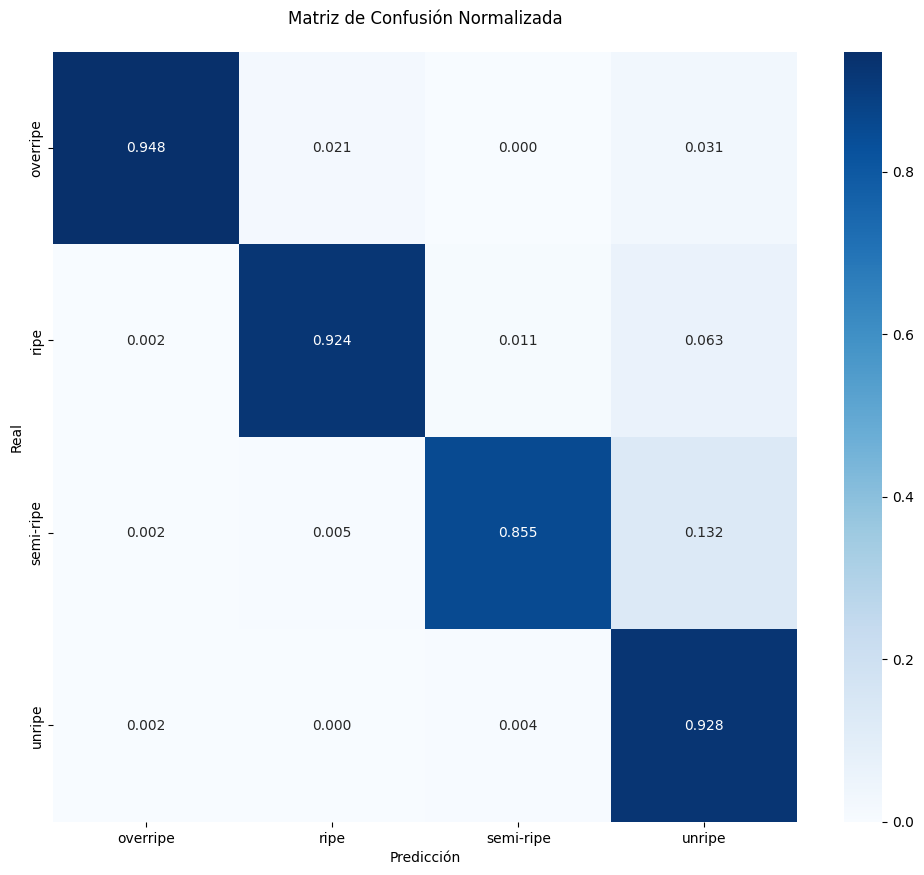


2. Comparación de Métricas por Clase


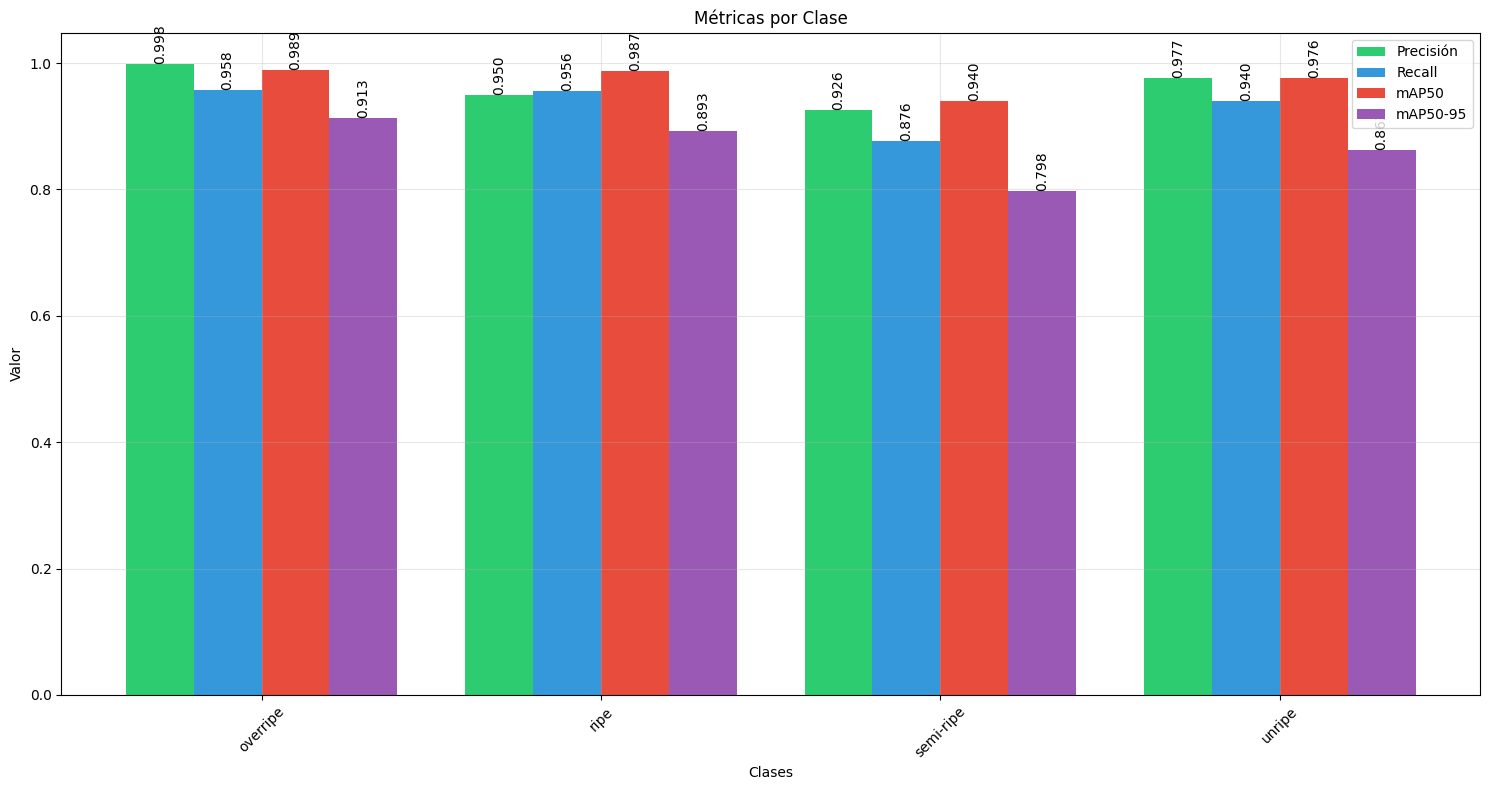

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!pip install ultralytics
!pip install seaborn
from ultralytics import YOLO
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
from IPython.display import display, HTML

class CoffeeVisualizer:
   def __init__(self):
       self.MODEL_PATH = '/content/drive/MyDrive/coffee_project/coffee_training_results/coffee_model_20250202_19542/weights/best.pt'
       self.DATA_YAML = '/content/drive/MyDrive/coffee_project/balanced_coffee_dataset/data.yaml'
       self.class_names = ['overripe', 'ripe', 'semi-ripe', 'unripe']
       self.colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99']
       self.metrics = {
           'Precisión': [0.998, 0.950, 0.926, 0.977],
           'Recall': [0.958, 0.956, 0.876, 0.940],
           'mAP50': [0.989, 0.987, 0.940, 0.976],
           'mAP50-95': [0.913, 0.893, 0.798, 0.863]
       }

   def print_metrics(self):
       """Imprimir métricas en formato texto"""
       print("\nMétricas Globales:")
       print(f"Precisión global: 96.3%")
       print(f"Recall global: 93.2%")
       print(f"mAP50: 97.3%")
       print(f"mAP50-95: 86.6%")

       print("\nMétricas por Clase:")
       for i, clase in enumerate(self.class_names):
           print(f"\n{clase.capitalize()}:")
           print(f"  Precisión: {self.metrics['Precisión'][i]:.3f}")
           print(f"  Recall: {self.metrics['Recall'][i]:.3f}")
           print(f"  mAP50: {self.metrics['mAP50'][i]:.3f}")
           print(f"  mAP50-95: {self.metrics['mAP50-95'][i]:.3f}")

       print("\nVelocidad de Inferencia:")
       print("Preprocesamiento: 0.2ms")
       print("Inferencia: 1.1ms")
       print("Postprocesamiento: 1.6ms")
       print("Total por imagen: 2.9ms")

   def plot_confusion_matrix(self):
       """Mostrar matriz de confusión"""
       conf_matrix = np.array([
           [0.948, 0.021, 0.000, 0.031],
           [0.002, 0.924, 0.011, 0.063],
           [0.002, 0.005, 0.855, 0.132],
           [0.002, 0.000, 0.004, 0.928]
       ])

       plt.figure(figsize=(12, 10))
       sns.heatmap(conf_matrix,
                  annot=True,
                  fmt='.3f',
                  cmap='Blues',
                  xticklabels=self.class_names,
                  yticklabels=self.class_names)
       plt.title('Matriz de Confusión Normalizada', pad=20)
       plt.xlabel('Predicción')
       plt.ylabel('Real')
       plt.show()

   def plot_metrics_bars(self):
       """Mostrar gráfico de barras de métricas"""
       plt.figure(figsize=(15, 8))
       x = np.arange(len(self.class_names))
       width = 0.2

       plt.bar(x - width*1.5, self.metrics['Precisión'], width, label='Precisión', color='#2ecc71')
       plt.bar(x - width/2, self.metrics['Recall'], width, label='Recall', color='#3498db')
       plt.bar(x + width/2, self.metrics['mAP50'], width, label='mAP50', color='#e74c3c')
       plt.bar(x + width*1.5, self.metrics['mAP50-95'], width, label='mAP50-95', color='#9b59b6')

       plt.xlabel('Clases')
       plt.ylabel('Valor')
       plt.title('Métricas por Clase')
       plt.xticks(x, self.class_names, rotation=45)
       plt.legend()
       plt.grid(True, alpha=0.3)

       for i in range(len(self.class_names)):
           for j, metric in enumerate(['Precisión', 'Recall', 'mAP50', 'mAP50-95']):
               plt.text(i + (j-1.5)*width, self.metrics[metric][i],
                       f'{self.metrics[metric][i]:.3f}',
                       ha='center', va='bottom', rotation=90)

       plt.tight_layout()
       plt.show()

def main():
   visualizer = CoffeeVisualizer()

   print("Métricas del Modelo:")
   visualizer.print_metrics()

   print("\n1. Matriz de Confusión")
   visualizer.plot_confusion_matrix()

   print("\n2. Comparación de Métricas por Clase")
   visualizer.plot_metrics_bars()

if __name__ == "__main__":
   main()


image 1/1 /content/drive/MyDrive/prueba2.jpg: 640x704 5 overripes, 15 ripes, 5 semi-ripes, 6 unripes, 52.6ms
Speed: 3.3ms preprocess, 52.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 704)
Results saved to runs/detect/predict3


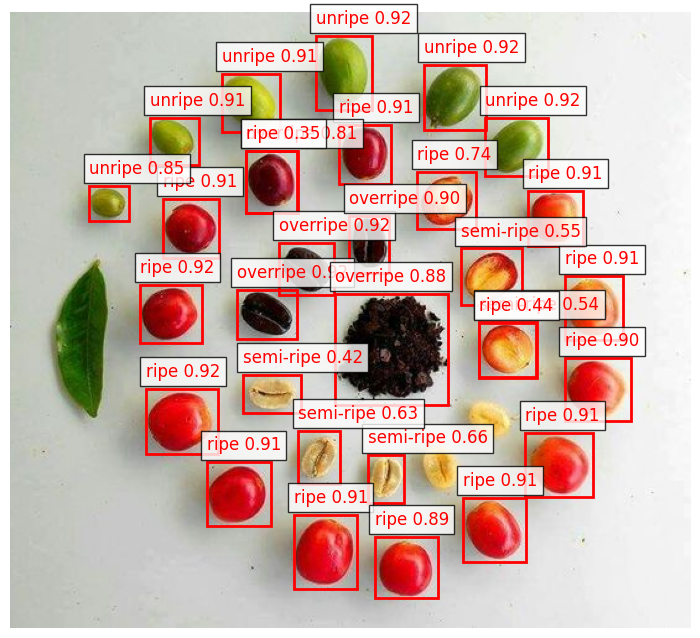


Resumen de predicciones:
- unripe: 92.40% de confianza
- overripe: 92.19% de confianza
- unripe: 92.19% de confianza
- ripe: 92.17% de confianza
- ripe: 92.14% de confianza
- unripe: 92.12% de confianza
- overripe: 92.03% de confianza
- unripe: 91.43% de confianza
- ripe: 91.41% de confianza
- ripe: 91.37% de confianza
- ripe: 91.11% de confianza
- unripe: 91.06% de confianza
- ripe: 91.02% de confianza
- ripe: 90.91% de confianza
- ripe: 90.86% de confianza
- ripe: 90.80% de confianza
- ripe: 90.64% de confianza
- ripe: 90.23% de confianza
- overripe: 89.55% de confianza
- ripe: 88.90% de confianza
- overripe: 87.66% de confianza
- unripe: 85.42% de confianza
- overripe: 81.46% de confianza
- ripe: 73.53% de confianza
- semi-ripe: 66.40% de confianza
- semi-ripe: 62.96% de confianza
- semi-ripe: 55.15% de confianza
- semi-ripe: 53.81% de confianza
- ripe: 44.16% de confianza
- semi-ripe: 42.25% de confianza
- ripe: 35.01% de confianza


In [ ]:

from ultralytics import YOLO
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import torch

class CoffeePredictor:
    def __init__(self):
        self.MODEL_PATH = '/content/drive/MyDrive/coffee_project/coffee_training_results/coffee_model_20250202_19542/weights/best.pt'
        self.class_names = ['overripe', 'ripe', 'semi-ripe', 'unripe']
        self.model = YOLO(self.MODEL_PATH)

    def predict_image(self, image_path, conf_threshold=0.25):
        # Hacer predicción
        results = self.model.predict(
            source=image_path,
            conf=conf_threshold,
            save=True
        )

        # Mostrar imagen con predicciones
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(12, 8))
        plt.imshow(img)

        # Dibujar predicciones
        for result in results:
            boxes = result.boxes
            for box in boxes:
                # Obtener coordenadas y moverlas a CPU
                x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
                conf = box.conf[0].cpu().numpy()
                cls = int(box.cls[0].cpu().numpy())

                # Dibujar bbox
                plt.gca().add_patch(plt.Rectangle((x1, y1), x2-x1, y2-y1,
                                               fill=False, color='red', linewidth=2))

                # Añadir etiqueta
                plt.text(x1, y1-10,
                        f'{self.class_names[cls]} {conf:.2f}',
                        color='red',
                        fontsize=12,
                        bbox=dict(facecolor='white', alpha=0.8))

        plt.axis('off')
        plt.show()

        # Imprimir resumen
        print("\nResumen de predicciones:")
        for result in results:
            boxes = result.boxes
            for box in boxes:
                conf = float(box.conf[0].cpu().numpy())
                cls = int(box.cls[0].cpu().numpy())
                print(f"- {self.class_names[cls]}: {conf:.2%} de confianza")

# Crear instancia del predictor
predictor = CoffeePredictor()

# Hacer predicción
predictor.predict_image('/content/drive/MyDrive/prueba2.jpg')